In [27]:
### Lets Do That ###

In [1]:
!pip install pennylane pennylane-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 12.0 MB/s eta 0:00:00


In [2]:
import pennylane as qml

dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()

print(circuit())


[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [3]:
!pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [61]:
import cirq

In [62]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from skimage.transform import resize
import os
import urllib.request
import gzip
import sympy

In [63]:
import sympy

# Function to download and load Fashion MNIST
def load_fashion_mnist():
    base_url = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/"
    files = {
        "train_images": "train-images-idx3-ubyte.gz",
        "train_labels": "train-labels-idx1-ubyte.gz",
        "test_images": "t10k-images-idx3-ubyte.gz",
        "test_labels": "t10k-labels-idx1-ubyte.gz"
    }

    data = {}
    for key, filename in files.items():
        if not os.path.exists(filename):
            urllib.request.urlretrieve(base_url + filename, filename)

        with gzip.open(filename, "rb") as f:
            if "images" in key:
                data[key] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28) / 255.0
            else:
                data[key] = np.frombuffer(f.read(), np.uint8, offset=8)

    return data["train_images"], data["train_labels"], data["test_images"], data["test_labels"]

In [64]:
X_train, y_train, X_test, y_test = load_fashion_mnist()

In [65]:
def filter_data(x, y):
    keep = (y == 5) | (y == 9)
    x, y = x[keep], y[keep]
    y = y == 5  # Convert to binary (5 -> 1, 9 -> 0)
    return x, y

In [66]:
X_train, y_train = filter_data(X_train, y_train)
X_test, y_test = filter_data(X_test, y_test)

In [67]:
def resize_images(images, new_size=(2, 2)):
    return np.array([resize(img, new_size, anti_aliasing=True) for img in images])

In [68]:
X_train_resized = resize_images(X_train)
X_test_resized = resize_images(X_test)

In [69]:
X_train = X_train_resized.reshape(X_train_resized.shape[0], 1, 4, 1)
X_test = X_test_resized.reshape(X_test_resized.shape[0], 1, 4, 1)

In [70]:
def binary_encoding(X, threshold=0.5):
    encoded_images = []
    for image in X:
        encoded_image = [1 if pixel > threshold else 0 for pixel in image[0]]
        encoded_images.append(encoded_image)
    return np.array(encoded_images)

In [71]:
X_train = binary_encoding(X_train)

In [72]:
dev = qml.device("default.qubit", wires=4)

In [73]:
def quantum_circuit(data):
    for i in range(len(data)):
        if data[i] > 0:
            qml.X(wires=i)  # Apply X gate if data[i] is non-zero
    return qml.expval(qml.PauliZ(0))  # Return an expectation value for qubit 0

In [74]:
def create_pennylane_circuit(encoded_image):
    return quantum_circuit(encoded_image)

In [75]:
X_train_circuits = [create_pennylane_circuit(encoded_image) for encoded_image in X_train]

In [78]:
def create_qnn():
    # Define quantum device and circuit
    dev = qml.device("default.qubit", wires=4)

    @qml.qnode(dev)
    def qnn_circuit(data):
        for i in range(len(data)):
            if data[i] > 0:
                qml.X(wires=i)  # Apply X gate based on pixel data
        return qml.expval(qml.PauliZ(0))  # Measure qubit 0

    return qnn_circuit

In [79]:
qnn_model = create_qnn()

In [80]:
results = [qnn_model(image) for image in X_train]
print("Quantum Model Results:")
print(results)

Quantum Model Results:
[array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.), array(1.

In [81]:
y_train_h = np.array([1 if i == 1 else -1 for i in y_train])  # Binary classification: 5 -> 1, 9 -> -1

In [82]:
import pennylane as qml
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Enable eager execution
tf.config.run_functions_eagerly(True)

# Define the quantum device
dev = qml.device("default.qubit", wires=4)

# Define the quantum node (Pennylane quantum circuit)
@qml.qnode(dev)
def create_pennylane_circuit(input_data):
    # Apply the X-gate based on the input_data (binary encoded)
    for i, pixel in enumerate(input_data):
        if pixel > 0:
            qml.X(wires=i)

    # Return the expectation value of the first qubit
    return qml.expval(qml.PauliZ(0))

# Define the classical neural network model
class QuantumNeuralNetwork(tf.keras.Model):
    def __init__(self):
        super(QuantumNeuralNetwork, self).__init__()
        self.dense = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        # Ensure inputs are flattened to 1D
        inputs = tf.reshape(inputs, (-1, 4))  # Flatten the inputs (batch_size, 4)

        # Apply the quantum circuit for each input sample in the batch
        quantum_results = np.array([create_pennylane_circuit(img) for img in inputs.numpy()])

        # Reshape the quantum results to be 2D (batch_size, 1)
        quantum_results = quantum_results.reshape(-1, 1)

        # Pass the quantum results through the classical dense layer
        return self.dense(quantum_results)

# Initialize the quantum neural network model
model = QuantumNeuralNetwork()

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model
history = model.fit(X_train, y_train_h, batch_size=32, epochs=5, validation_split=0.15)

# Evaluate the model on test data
model.evaluate(X_test, y_test)

Epoch 1/5
319/319 ━━━━━━━━━━━━━━━━━━━━ 23s 71ms/step - accuracy: 0.0000e+00 - loss: 0.5618 - val_accuracy: 0.0000e+00 - val_loss: 0.3880
Epoch 2/5
319/319 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.0000e+00 - loss: 0.3651 - val_accuracy: 0.0000e+00 - val_loss: 0.2508
Epoch 3/5
319/319 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.0000e+00 - loss: 0.2413 - val_accuracy: 0.0000e+00 - val_loss: 0.1647
Epoch 4/5
319/319 ━━━━━━━━━━━━━━━━━━━━ 40s 69ms/step - accuracy: 0.0000e+00 - loss: 0.1849 - val_accuracy: 0.0000e+00 - val_loss: 0.1082
Epoch 5/5
319/319 ━━━━━━━━━━━━━━━━━━━━ 42s 71ms/step - accuracy: 0.0000e+00 - loss: 0.1557 - val_accuracy: 0.0000e+00 - val_loss: 0.0685
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.5009 - loss: 0.6955


[0.6956035494804382, 0.5]

In [83]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

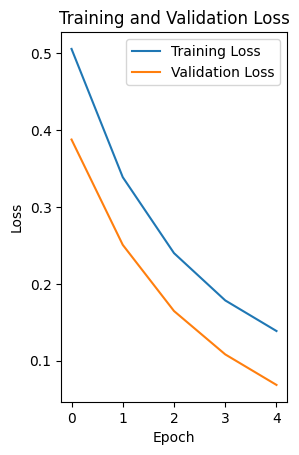

In [84]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

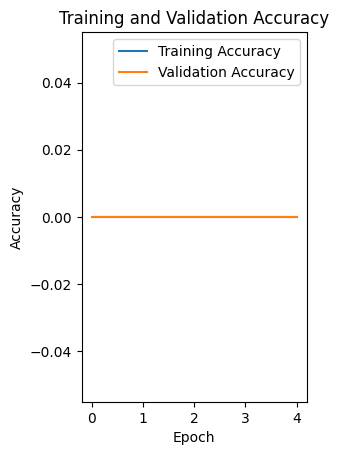

In [85]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()